In [1]:
import config
import os
import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPT2TokenizerFast
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain

c:\Users\minyu\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
file_path = "doc/test01.txt"
with open(file_path, "r", encoding="utf-8") as f:
    doc = f.read()
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))

text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 512,
    chunk_overlap  = 24,
    length_function = count_tokens,
)
chunks = text_splitter.create_documents([doc])


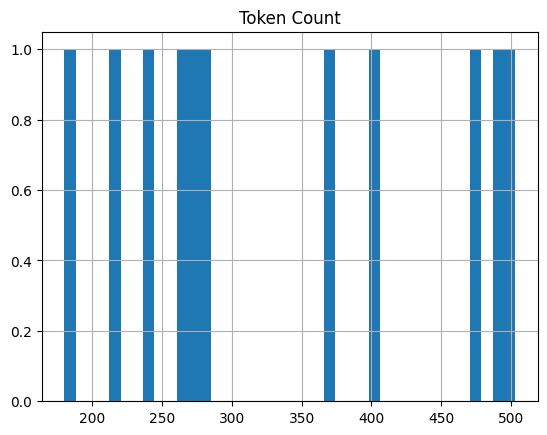

In [10]:
token_counts = [count_tokens(chunk.page_content) for chunk in chunks]
# Create a DataFrame from the token counts
df = pd.DataFrame({'Token Count': token_counts})
# Create a histogram of the token count distribution
df.hist(bins=40, )
# Show the plot
plt.show()

In [3]:
# Get embedding model
embeddings = OpenAIEmbeddings()

# Create vector database
db = FAISS.from_documents(chunks, embeddings)

In [4]:
chain = load_qa_chain(OpenAI(temperature=0), chain_type="stuff")

query = "我一周加班四个小时, 外出拜访客户八个小时, 我的绩效分数是多少"
docs = db.similarity_search(query)

chain.run(input_documents=docs, question=query)

' 加班4小时等于1分，外出拜访客户8小时等于0.2分，所以你的绩效分数是1.2分。'